In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [4]:
# import os
# filelist = os.listdir()
# # # filelist[54]

In [15]:
filelist[43:-1]

['60401-RCSPRF_2024_Apr_06_19h_22m_24sec_Wind.CSV',
 '60401-RCSPRF_2024_Apr_06_19h_27m_25sec_Wind.CSV',
 '60401-RCSPRF_2024_Apr_06_19h_32m_25sec_Wind.CSV',
 '60401-RCSPRF_2024_Apr_06_19h_37m_25sec_Wind.CSV',
 '60401-RCSPRF_2024_Apr_06_19h_42m_25sec_Wind.CSV',
 '60401-RCSPRF_2024_Apr_06_19h_47m_25sec_Wind.CSV',
 '60401-RCSPRF_2024_Apr_06_19h_52m_26sec_Wind.CSV',
 '60401-RCSPRF_2024_Apr_06_19h_57m_26sec_Wind.CSV',
 '60401-RCSPRF_2024_Apr_06_20h_02m_26sec_Wind.CSV',
 '60401-RCSPRF_2024_Apr_06_20h_07m_26sec_Wind.CSV',
 '60401-RCSPRF_2024_Apr_06_20h_12m_27sec_Wind.CSV',
 '60401-RCSPRF_2024_Apr_06_20h_17m_27sec_Wind.CSV',
 '60401-RCSPRF_2024_Apr_06_20h_22m_27sec_Wind.CSV',
 '60401-RCSPRF_2024_Apr_06_20h_27m_27sec_Wind.CSV',
 '60401-RCSPRF_2024_Apr_06_20h_32m_27sec_Wind.CSV',
 '60401-RCSPRF_2024_Apr_06_20h_37m_28sec_Wind.CSV',
 '60401-RCSPRF_2024_Apr_06_20h_42m_28sec_Wind.CSV',
 '60401-RCSPRF_2024_Apr_06_20h_47m_28sec_Wind.CSV',
 '60401-RCSPRF_2024_Apr_06_20h_52m_28sec_Wind.CSV',
 '60401-RCSP

In [35]:
orderlist = filelist[43:-1] + filelist[:20] + [filelist[-1]] + filelist[20:43]

In [37]:
df = pd.concat(map(pd.read_csv, orderlist), ignore_index=True)
df

,'Timestamp','Wind_Sensor_1_Speed','Wind_Sensor_2_Speed','Wind_Sensor_1_Direction','Wind_Sensor_2_Direction'
0,06/04/2024 19:21:52.4450,0.004215,0.018845,91.804609,353.750266
1,06/04/2024 19:21:52.4460,0.002937,0.016929,92.011579,354.141221
2,06/04/2024 19:21:52.4470,0.004854,0.019165,91.862101,353.727269
3,06/04/2024 19:21:52.4480,0.005173,0.018207,91.988583,353.980240
4,06/04/2024 19:21:52.4490,0.001659,0.015651,92.011579,353.934245
...,...,...,...,...,...
34305895,07/04/2024 05:02:47.4400,0.139375,0.391936,175.121494,231.300737
34305896,07/04/2024 05:02:47.4410,0.137777,0.390020,174.742049,230.737302
34305897,07/04/2024 05:02:47.4420,0.131706,0.386506,174.604069,230.679808
34305898,07/04/2024 05:02:47.4430,0.135541,0.387464,174.707554,230.806294


In [39]:
# df.to_csv('launchDay.csv')

In [40]:
ws1 = df["'Wind_Sensor_1_Speed'"].to_numpy()
ws2 = df["'Wind_Sensor_2_Speed'"].to_numpy()
wd1 = df["'Wind_Sensor_1_Direction'"].to_numpy()
wd2 = df["'Wind_Sensor_2_Direction'"].to_numpy()
time = df["'Timestamp'"].to_numpy()
len(time)*0.001/60
# time[-1]

571.765

In [42]:
vol1 = 0.19794096*5 -0.27952213
vol2 = 0.19119089*5 - 0.06300144
slope1 = 5.04510554
slope2 = 5.2279065
con1 = 1.42345604
con2 = 0.339628
vol1

0.71018267

In [43]:
def WS1(vol):
    if vol < vol1:
        a = 6*vol
    elif vol > vol1:
        a = slope1*vol + con1
    return a
def WS2(vol):
    if vol < vol2:
        b = 6*vol
    elif vol > vol2:
        b = slope2*vol + con2
    return b

In [44]:
# filelist[137]
wind_speed1 = []
wind_speed2 = []
wind_direc1 = []
wind_direc2 = []
t = []
# t2 = []
for j in range(1, 572):
    t.append(j)
    wind_direc1.append(np.average(wd1[60000*(j - 1):60000*j - 1]))
    wind_direc2.append(np.average(wd2[60000*(j - 1):60000*j - 1]))
    # t2.append(time[60000*(j - 1)])
    WS1_Avg = np.average(ws1[60000*(j - 1):60000*j - 1])
    WS2_Avg = np.average(ws2[60000*(j - 1):60000*j - 1])
    
    wind_speed1.append(WS1(WS1_Avg))
    wind_speed2.append(WS2(WS2_Avg))

In [45]:
today_date = datetime.datetime(2024, 4, 7).date()

# Define start and end time with today's date
start_time = datetime.datetime.combine(today_date, datetime.time(hour=0, minute=51, second=32))
end_time = datetime.datetime.combine(today_date, datetime.time(hour=10, minute=32, second=42))
# start_time = datetime.datetime.strptime('05:34', '%H:%M')
# end_time = datetime.datetime.strptime('08:32', '%H:%M')

# Define length of array
array_length = len(wind_speed1)  # specify the length you desire
# array_length2 = len(wind_speed1_2)
# Calculate time difference
time_diff = end_time - start_time

# Calculate time step
time_step = time_diff / (array_length - 1)
# time_step2 = time_diff / (array_length2 - 1)
# Generate time array
time_array = [start_time + i * time_step for i in range(array_length)]
# time_array2 = [start_time + i * time_step2 for i in range(array_length2)]
# Convert time array to NumPy array if needed
time_array_np = np.array(time_array)
# time_array_np2 = np.array(time_array2)
# print(time_array_np) 
time_array_np[0]

datetime.datetime(2024, 4, 7, 0, 51, 32)

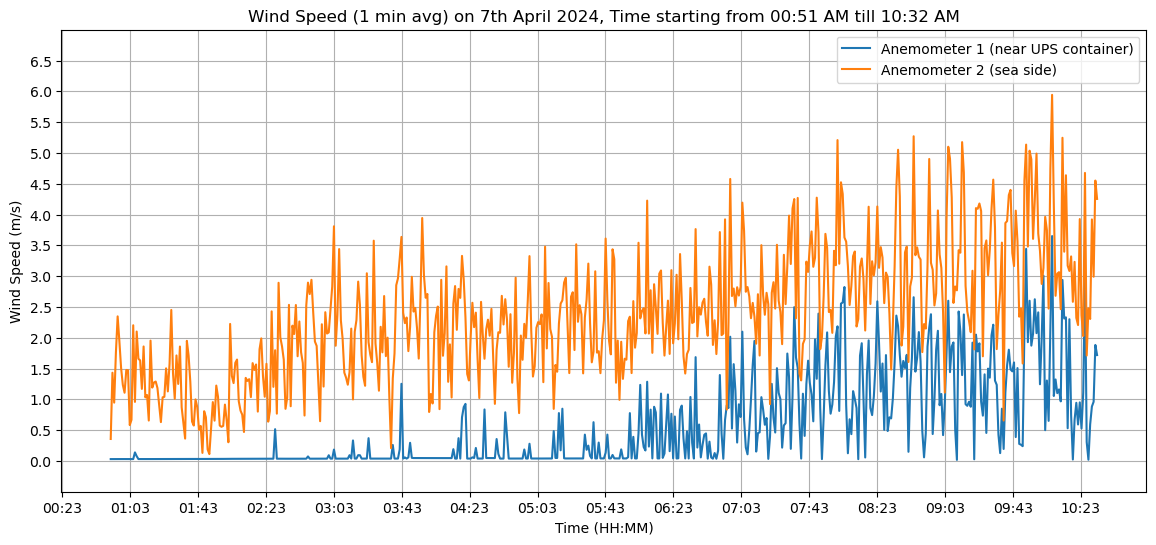

In [48]:
plt.figure(figsize=(14,6))
plt.plot(time_array_np, wind_speed1, label = 'Anemometer 1 (near UPS container)')
plt.plot(time_array_np, wind_speed2, label = 'Anemometer 2 (sea side)')
# plt.plot(time_array_np, np.add(wind_speed1, wind_speed2)/2, label = 'Avg Speed')
# plt.plot(time_array_np2, np.add(wind_speed1_2, wind_speed2_2)/2)
# plt.plot(time_array_np2, wind_speed1_2)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

# Set x-axis tick locator to display ticks every 10 minutes
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MinuteLocator(interval=40))
plt.grid()
plt.ylabel('Wind Speed (m/s)')
plt.ylim((-0.5, 7))
plt.yticks(np.arange(0, 7, step=0.5))
plt.xlabel('Time (HH:MM)')
plt.legend()
plt.title('Wind Speed (1 min avg) on 7th April 2024, Time starting from 00:51 AM till 10:32 AM')
plt.savefig('7thApril_morn_speed.png')

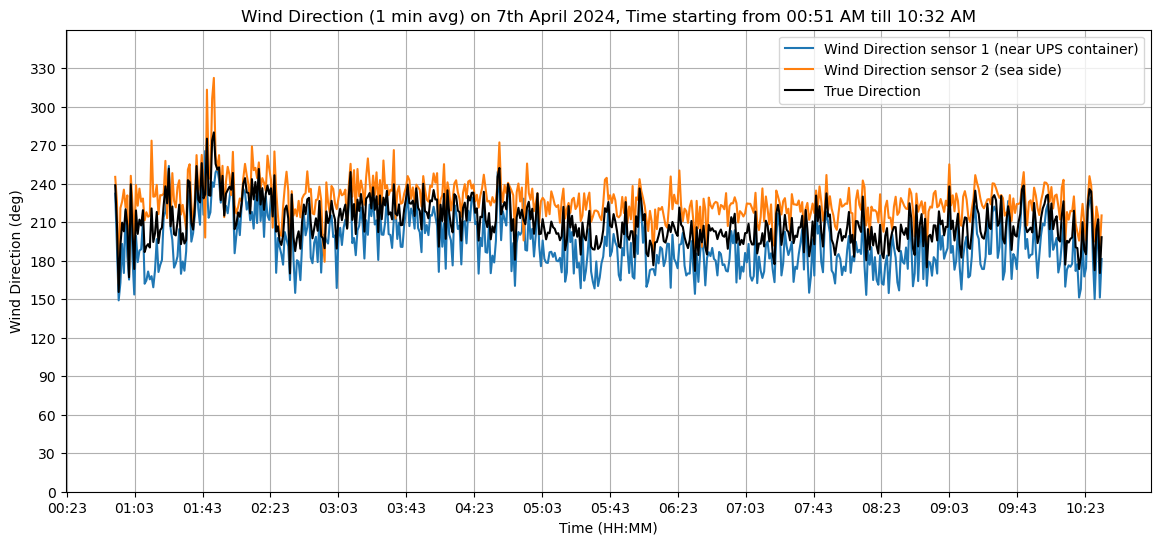

In [49]:
plt.figure(figsize=(14,6))
plt.plot(time_array_np, wind_direc1, label = 'Wind Direction sensor 1 (near UPS container)')
plt.plot(time_array_np, wind_direc2, label = 'Wind Direction sensor 2 (sea side)')
plt.plot(time_array_np, np.add(wind_direc1, wind_direc2)/2, label = 'True Direction', color='black')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

# Set x-axis tick locator to display ticks every 10 minutes
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MinuteLocator(interval=40))
plt.grid()
plt.ylabel('Wind Direction (deg)')
plt.ylim((0,360))
plt.yticks(np.arange(0, 360, step=30))
plt.xlabel('Time (HH:MM)')
plt.legend()
plt.title('Wind Direction (1 min avg) on 7th April 2024, Time starting from 00:51 AM till 10:32 AM')
plt.savefig('7thApril_morn_direc.png')